# Plots & Tables for *Appendix III: Chamber Variables and Physical Effects*

### Auxiliary code + plotting setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from matplotlib import gridspec
import pandas as pd
import seaborn as sns

In [3]:
# Set tex formatting for plots
# Set tex formatting for plots
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
#from matplotlib.font_manager import FontProperties
#fontP = FontProperties()
#fontP.set_size('small')

In [4]:
matplotlib.rcParams.update({'font.size': 7})
MM = 1/25.4

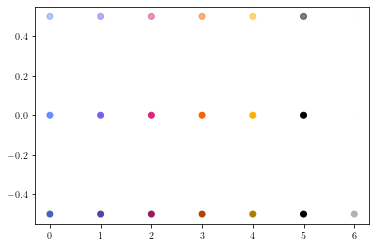

In [5]:
def norm(x):
    xx = x - x.min()
    return xx / xx.max()

def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

# Color palettes
color_blind_1 = ['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4', '#020202',]
color_blind_2 = ['#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac']
color_blind_3 = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']
ibm_color_blind = ["#648fff", "#785ef0", "#dc267f", "#fe6100", "#ffb000", "#000000", "#ffffff"]
rainbow10 = ["#ff4365", "#ffdd43", "#59ff43", "#43ffdd", "#7395ff", "#4365ff", "#e943ff", "#601e9e", "#6a6a6a", "#964b00"]


# Pick one and show

palette = ibm_color_blind

base = to_rgb(palette)
basea = to_rgb(palette, a=0.5)
baseb = to_rgb(palette, b=0.7)
plt.scatter(np.arange(len(base)), np.zeros(len(base)), c = base)
plt.scatter(np.arange(len(base)), np.ones(len(base))*0.5, c = basea)
plt.scatter(np.arange(len(base)), np.ones(len(base))*-0.5, c = baseb)

from matplotlib import ticker
def format_y_axis(ax, label="", right=False, rotation=90, ha="center", va="bottom"):
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    ax.yaxis.set_major_formatter(formatter)
    if right:
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()

    ax.figure.canvas.draw() # Must draw to get offset below
    ax.yaxis.offsetText.set_visible(False)
    offset = ax.yaxis.get_major_formatter().get_offset()    
    ax.yaxis.set_label_text(label + " " + offset, rotation=rotation, ha=ha, va=va)

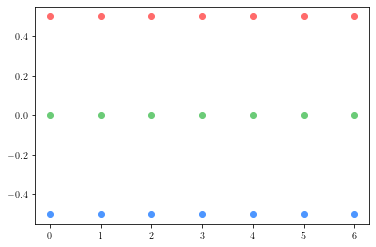

In [6]:
# RGB palette for some of the plots

red = "#FF6B6B"
green = "#6BCB77"
blue = "#4D96FF"
plt.scatter(np.arange(len(base)), np.ones(len(base))*0.5, color=red)
plt.scatter(np.arange(len(base)), np.zeros(len(base)), color=green)
plt.scatter(np.arange(len(base)), np.ones(len(base))*-0.5, color=blue)

## Table 3: Calibrated reference voltages

### Wind Tunnel

Use the `analog_calibration` experiment from the `wt_test_v1` dataset.

In [7]:
import causalchamber.datasets as datasets
dataset = datasets.Dataset("wt_test_v1", root="/tmp")
df = dataset.get_experiment("analog_calibration").as_pandas_dataframe()

# Calibrate using current_in and current_out sensor
medians = df.groupby('v_in').current_in.median()
ref_voltages_in = medians[5.0] / medians * 5

medians = df.groupby('v_out').current_out.median()
ref_voltages_out = medians[5.0] / medians * 5

print("Estimated reference voltages")
ref_voltages_in, ref_voltages_out

If you use our datasets or models for your work please consider citing:

@article{gamella2024chamber,
  title={The Causal Chambers: Real Physical Systems as a Testbed for AI Methodology},
  author={Gamella, Juan L. and B"uhlmann, Peter and Peters, Jonas},
  journal={(work in progress)},
  year={2023}
}


Fetching list of available datasets from https://causalchamber.s3.eu-central-1.amazonaws.com/downloadables/directory.yaml ... done.
Dataset wt_test_v1 found in "/tmp/wt_test_v1".
Estimated reference voltages


(v_in
 1.10    1.160068
 2.56    2.650778
 5.00    5.000000
 Name: current_in, dtype: float64,
 v_out
 1.10    1.158403
 2.56    2.650602
 5.00    5.000000
 Name: current_out, dtype: float64)

In [8]:
vref = [1.16, 2.65, 5]

### Light Tunnel

Use the `analog_calibration` experiment from the `lt_test_v1` dataset.

In [9]:
import causalchamber.datasets as datasets
dataset = datasets.Dataset("lt_test_v1", root="/tmp")
df = dataset.get_experiment("analog_calibration").as_pandas_dataframe()

Dataset lt_test_v1 found in "/tmp/lt_test_v1".


In [10]:
df_fixed = df[df.flag == 0]
# Calibrate using current sensor
medians = df_fixed.groupby('v_c').current.median()
vref_current = medians[5.0] / medians * 5

vref_current

v_c
1.10    1.085727
2.56    2.551125
5.00    5.000000
Name: current, dtype: float64

In [11]:
vref = [1.09, 2.55, 5]

## Figure 7: Effect of loads and hatch on barometer readings, fan speeds and drawn current

Dataset wt_test_v1 found in "/tmp/wt_test_v1".


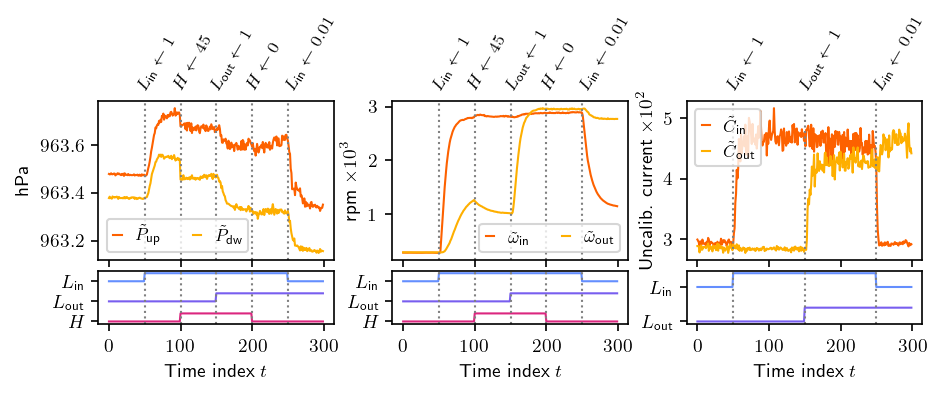

In [12]:
# Load dataset
import causalchamber.datasets as datasets
dataset = datasets.Dataset("wt_test_v1", root="/tmp")
df = dataset.get_experiment("steps").as_pandas_dataframe()

lw=1

# Plot
fig = plt.figure(figsize=(180*MM,50*MM), dpi=150)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(2, 3, wspace=0.25, hspace=0.1, height_ratios=[0.75, 0.25])

def plot_lines(ax, where=[50,100,150,200,250]):
    # Plot lines
    for x in where:
        ax.axvline(x, color='gray', linestyle=":", linewidth=1)
        
        
def plot_text(ax, where=[50,100,150,200,250], what=[r'$L_\text{in} \leftarrow 1$', r'$H \leftarrow 45$', r'$L_\text{out} \leftarrow 1$', r'$H \leftarrow 0$', r'$L_\text{in} \leftarrow 0.01$'], rotation=60):
    # Plot text
    #ax.text(30, 1.1, '$H=0$\n$L_\\text{in}=0.01$\n$L_\\text{out} = 0.01$', ha="right", va="bottom", rotation=0, size=7)
    for x,text in zip(where, what):        
        ax.text(x/320, 1.05, text, ha="left", va="bottom", rotation=rotation, size=8, transform=ax.transAxes)

# Actuators
for i in range(3):
    plt.subplot(gs[1,i])
    ax = plt.gca()
    plt.plot(norm(df.load_in)*0.2-0.5, color=base[0], linewidth = lw)
    plt.plot(norm(df.load_out)*0.2-1, color=base[1], linewidth = lw)
    plt.xlabel("Time index $t$")
    if i != 2:
        plt.plot(norm(df.hatch)*0.2-1.5, color=base[2], linewidth = lw)
        plt.yticks([-0.5, -1, -1.5],[r'$L_\text{in}$', r'$L_\text{out}$', r'$H$'])
        plot_lines(ax)
    else:
        plt.yticks([-0.5, -1],[r'$L_\text{in}$', r'$L_\text{out}$'])
        plot_lines(ax, where=[50,150,250])

# Barometers
plt.subplot(gs[0,0])
ax = plt.gca()
ax.plot(df.pressure_upwind/100, color=base[3], label=r'$\tilde{P}_\text{up}$', linewidth = lw)
ax.plot(df.pressure_downwind/100, color=base[4], label=r'$\tilde{P}_\text{dw}$', linewidth = lw)
plot_lines(ax)
plot_text(ax)
ax.set_xticklabels([])

#ax.set_yticklabels([])
plt.ylabel("hPa")
plt.legend(prop = {'size': 8}, ncol=2, handlelength=0.5, loc="lower left")
        
# Fan speeds
plt.subplot(gs[0,1])
ax = plt.gca()
#ax.plot(norm(df.rpm_in), color=base[3], label=r'$\tilde{\omega}_\text{in}$')
#ax.plot(norm(df.rpm_out), color=base[4], label=r'$\tilde{\omega}_\text{out}$')
ax.plot(df.rpm_in, color=base[3], label=r'$\tilde{\omega}_\text{in}$', linewidth = lw)
ax.plot(df.rpm_out, color=base[4], label=r'$\tilde{\omega}_\text{out}$', linewidth = lw)
plot_lines(ax)
plot_text(ax)
ax.set_xticklabels([])
#plt.yticks([0,1000,2000,3000], ['0', '1K', '2K', '3K'])
format_y_axis(ax, "rpm")
plt.legend(prop = {'size': 8}, ncol=2, handlelength=0.5, loc="lower right")

# Fan currents
plt.subplot(gs[0,2])
ax = plt.gca()
ax.plot(df.current_in, color=base[3], label=r'$\tilde{C}_\text{in}$', linewidth = lw)
ax.plot(df.current_out, color=base[4], label=r'$\tilde{C}_\text{out}$', linewidth = lw)
plot_lines(ax, where=[50,150,250])
plot_text(ax, where=[50,150,250], what=[r'$L_\text{in} \leftarrow 1$', r'$L_\text{out} \leftarrow 1$', r'$L_\text{in} \leftarrow 0.01$'])
ax.set_xticklabels([])
#ax.set_yticklabels([])
plt.ylabel("Uncalibrated current")
plt.legend(prop = {'size': 8}, ncol=1, handlelength=0.5, loc="upper left")
format_y_axis(ax, "Uncalib. current")
plt.savefig("figures/loads_hatch_effects.pdf", bbox_inches="tight")

## Figure 11: Effect of powering off the fans

Dataset wt_test_v1 found in "/tmp/wt_test_v1".


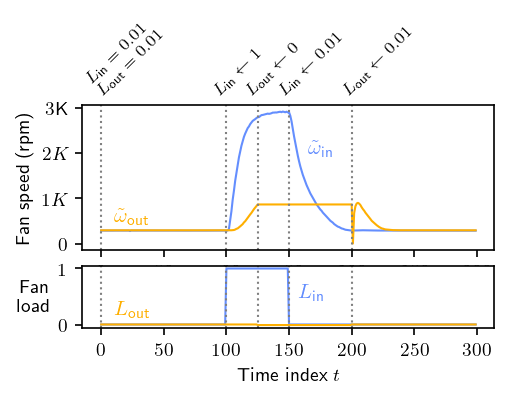

In [13]:
# Load dataset
#df = pd.read_csv("datasets/wt_test_v1/data/2024_04_05-13_48_34_zero_load.csv")
import causalchamber.datasets as datasets
dataset = datasets.Dataset("wt_test_v1", root="/tmp")
df = dataset.get_experiment("zero_load").as_pandas_dataframe()

# Plot
fig = plt.figure(figsize=(90*MM,50*MM), dpi=150)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(2, 1, wspace=0.05, hspace=0.15, height_ratios=[0.7, 0.3])

lw = 1
ls = ls=(0,(5,1))#"--"

# Fan speeds
plt.subplot(gs[0,0])
ax = plt.gca()
ax.plot(df.rpm_in, color=base[0], label=r'$\tilde{\omega}_\text{in}$', linewidth = lw)
ax.plot(df.rpm_out, color=base[4], label=r'$\tilde{\omega}_\text{in}$', linewidth = lw)
plot_lines(ax, where=[0,100,125,150,200])
plot_text(ax, where=[0,100,125,150,200], what=[r"$L_\text{in} = 0.01$""\n"r"$L_\text{out} = 0.01$",r"$L_\text{in} \leftarrow 1$", r"$L_\text{out} \leftarrow 0$", r"$L_\text{in} \leftarrow 0.01$", r"$L_\text{out} \leftarrow 0.01$"], rotation=45)
plt.yticks([0,1000,2000,3000], ["$0$","$1K$","$2K$","$3$K"])
plt.ylabel("Fan speed (rpm)")
#plt.ylabel("Fan\nspeed\n(rpm)", rotation=0, va="center", ha="right")
#format_y_axis(ax, r"$\tilde{\omega}_\text{in}$ (rpm)")
#plt.legend(ncol=1, handlelength=0.5, loc="upper right")#loc="center left", bbox_to_anchor=(1,0.5))
plt.text(10, 500, r"$\tilde{\omega}_\text{out}$", color=base[4], size=10)
plt.text(165, 2000, r"$\tilde{\omega}_\text{in}$", color=base[0], size=10)

# Fan loads
plt.subplot(gs[1,0])
ax = plt.gca()
ax.plot(df.load_in, color=base[0], label=r'$L_\text{in}$', linewidth = lw)
ax.plot(df.load_out, color=base[4], label=r'$L_\text{out}$', linewidth = lw)
plt.xlabel("Time index $t$")
plt.ylabel("Fan\nload", rotation=0, va="center", ha="right")
#plt.legend(ncol=1, handlelength=0.5, loc="center left", bbox_to_anchor=(1,0.5))
plt.text(10, 0.2, r"$L_\text{out}$", color=base[4], size=10)
plt.text(157, 0.5, r"$L_\text{in}$", color=base[0], size=10)
plot_lines(ax, where=[0,100,125,150,200])
plt.savefig("figures/fans_zero_load.pdf", bbox_inches="tight")

## Figure 8: Tachometer resolution and barometer oversampling

Dataset wt_test_v1 found in "/tmp/wt_test_v1".


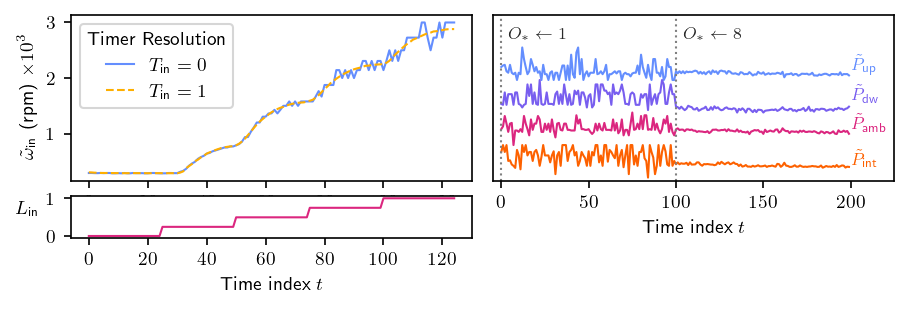

In [14]:
# Load datasets
import causalchamber.datasets as datasets
dataset = datasets.Dataset("wt_test_v1", root="/tmp")
df = dataset.get_experiment("tach_resolution").as_pandas_dataframe()
df_osr = dataset.get_experiment("osr_barometers").as_pandas_dataframe()

# Plot
fig = plt.figure(figsize=(180*MM,50*MM), dpi=150)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(2, 2, wspace=0.05, hspace=0.15, height_ratios=[0.8, 0.20])

lw = 1

#######################
# Tachometer resolution
plt.subplot(gs[0,0])
ax = plt.gca()
plt.plot(df.rpm_in[df.flag==0].values, linestyle="-", color=base[0], label=r"$T_\text{in}=0$", linewidth = lw)
plt.plot(df.rpm_in[df.flag==1].values, linestyle="--", color=base[4], label=r"$T_\text{in}=1$", linewidth = lw)

format_y_axis(ax, r"$\tilde{\omega}_\text{in}$ (rpm)")
plt.legend(ncol=1, handlelength=1.5, loc="upper left", title=r"Timer Resolution")
plt.subplot(gs[1,0])
ax = plt.gca()
plt.plot(df.load_in[df.flag==0].values, linestyle="-", color=base[2], linewidth = lw)
format_y_axis(ax, r"$L_\text{in}$", rotation=0, ha="right")
plt.xlabel("Time index $t$")

########################
# Barometer oversampling
plt.subplot(gs[0,1])
ax = plt.gca()
df = df_osr
plt.plot(norm(df.pressure_upwind.values), linestyle="-", color=base[0], label=r"$\tilde{P}_\text{up}$", linewidth = lw)
plt.plot(norm(df.pressure_downwind.values)-1, linestyle="-", color=base[1], label=r"$\tilde{P}_\text{up}$", linewidth = lw)
plt.plot(norm(df.pressure_ambient.values)-2, linestyle="-", color=base[2], label=r"$\tilde{P}_\text{up}$", linewidth = lw)
plt.plot(norm(df.pressure_intake.values)-3, linestyle="-", color=base[3], label=r"$\tilde{P}_\text{up}$", linewidth = lw)
plt.gca().axvline(0, color='gray', linestyle=":", linewidth=1)
plt.gca().axvline(100, color='gray', linestyle=":", linewidth=1)

plt.text(4, 1.25, r"$O_* \leftarrow 1$", color='#2a2a2a', fontsize=8)
plt.text(104, 1.25, r"$O_* \leftarrow 8$", color='#2a2a2a', fontsize=8)


plt.text(200, 0.3, r"$\tilde{P}_\text{up}$", color=base[0], fontsize=8, ha="left")
plt.text(200, -0.6, r"$\tilde{P}_\text{dw}$", color=base[1], fontsize=8, ha="left")
plt.text(200, -1.5, r"$\tilde{P}_\text{amb}$", color=base[2], fontsize=8, ha="left")
plt.text(200, -2.6, r"$\tilde{P}_\text{int}$", color=base[3], fontsize=8, ha="left")

plt.yticks([],[])
plt.xlabel("Time index $t$")
plt.ylim([-3.1, 2])
plt.xlim([-5,225])
plt.savefig("figures/tachometer_barometers.pdf", bbox_inches="tight")

## Figure 12: Reference voltages and oversampling rate on current sensors

Dataset lt_test_v1 found in "/tmp/lt_test_v1".
[1.10000002 2.55999994 5.        ] [1, 2, 8]
2.559999942779541


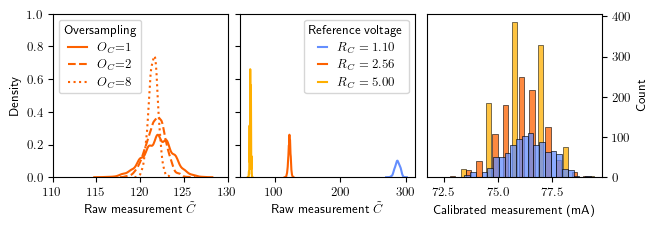

In [15]:
import causalchamber.datasets as datasets
dataset = datasets.Dataset("lt_test_v1", root="/tmp")
df = dataset.get_experiment("current_sensor").as_pandas_dataframe()

# Calculated above, under "Calibrated reference voltages"
vref = [1.085, 2.55, 5]
references = pd.unique(df.v_c)
rates =  [1,2,8]#pd.unique(df.osr_c)

print(references, rates)
linestyles = ['-', '--', ':']
delta=10
plt.figure(figsize=(180*MM,55*MM), dpi=100)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(1, 3, wspace=0.07, hspace=0.0)

yticks = [0, .2, .4, .6, .8, 1]
scolors = [base[i] for i in [0,3,4]]

#############################################################
# Oversampling plot
plt.subplot(gs[0])
ax = plt.gca()
v = references[1]
print(v)
for j,osr in enumerate(rates):
    measurements = df[(df.v_c == v) & (df.osr_c == osr)].current        
    sns.kdeplot(measurements, ax=ax,color=scolors[1], linestyle=linestyles[j], label=r"$O_C$=$%d$" % osr)        
plt.legend(title="Oversampling", handlelength=1.5)
plt.xlabel(r"Raw measurement $\tilde{C}$")
plt.yticks(yticks)
plt.xlim([110,130])

#############################################################
# Reference voltages plot
plt.subplot(gs[1])
ax = plt.gca()
for i,v in enumerate(references):    
    for j,osr in enumerate([1.0]):
        measurements = df[(df.v_c == v) & (df.osr_c == osr)].current
        sns.kdeplot(measurements, ax=ax, color=scolors[i], label=r"$R_C = %0.2f$" % v, zorder=-v)
        #sns.rugplot(measurements, color=scolors[i], linestyle=linestyles[j], linewidth=2)
    mean = df[(df.v_c == v)].current.mean()
plt.legend(title="Reference voltage", handlelength=0.7)
plt.xlabel(r"Raw measurement $\tilde{C}$")
plt.yticks(yticks, [])
plt.ylabel(None)

#############################################################
# Resolution plot
plt.subplot(gs[2])
ax = plt.gca()
for i,v in enumerate(references):
    for j,osr in enumerate([1.0]):
        measurements = df[(df.v_c == v) & (df.osr_c == osr)].current
        measurements = measurements * vref[i]
        measurements /= 1023
        measurements *= 250
        #sns.kdeplot(measurements, color=scolors[i], linestyle=linestyles[j], label=r"$V_C = %0.2f$" % v)
        sns.histplot(measurements, ax=ax, color=scolors[i], label=r"$R_C = %0.2f$" % v, zorder=-v)
        #sns.rugplot(measurements, color=scolors[i], linestyle=linestyles[j], linewidth=2)
    mean = df[(df.v_c == v)].current.mean()
#plt.legend()
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.xlabel(r"Calibrated measurement (mA)")
plt.savefig('figures/analog_sensor_current.pdf', bbox_inches='tight')

## Figure 14: Angle sensors

Dataset lt_test_v1 found in "/tmp/lt_test_v1".


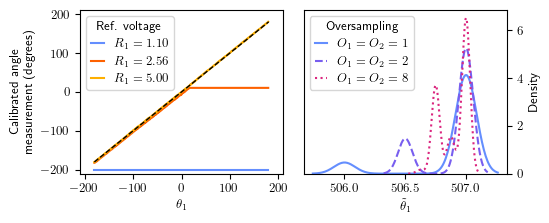

In [16]:
import causalchamber.datasets as datasets
dataset = datasets.Dataset("lt_test_v1", root="/tmp")
df = dataset.get_experiment("angle_sensors").as_pandas_dataframe()

vref = [1.085, 2.55, 5]

plt.figure(figsize=(140*MM,55*MM), dpi=100)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.0)

# Reference voltages
plt.subplot(gs[0])
df_sweep = df[df.flag==1]
for i,v in enumerate(sorted(pd.unique(df.v_angle_1))):
    dff = df_sweep[df_sweep.v_angle_1 == v]    
    plt.plot(dff.pol_1,
                (dff.angle_1 * vref[i] / 5 - 507) / 1023 * 720,
                color=scolors[i], label=r"$R_1 = %0.2f$" % v)
plt.legend(title='Ref. voltage', handlelength=1)
plt.plot([-180,180],[-180,180], color='black', linestyle='--', linewidth=1, label=r"$\tilde{\theta}^\star_1$")
plt.ylim([-210,210])
plt.xlim([-210,210])
plt.xticks([-200,-100,0,100,200])
plt.xlabel(r"$\theta_1$")
plt.ylabel("Calibrated angle\nmeasurement (degrees)")


# Oversampling voltages
linestyles = ['-', '--', ':']
plt.subplot(gs[1])
ax = plt.gca()
df_zero = df[df.flag==0]
for i,osr in enumerate([1,2,8]):
    dff = df_zero[df_zero.osr_angle_1==osr]
    sns.kdeplot(dff.angle_1, ax=ax, color=base[i], label=r"$O_1 = O_2 = %d$" % osr, zorder=-v, linestyle=linestyles[i])
plt.legend(title='Oversampling', handlelength=1)
plt.xlabel(r"$\tilde{\theta}_1$")
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.savefig('figures/angle_sensors.pdf', bbox_inches='tight')

## Figure 9: Effect of potentiometers $A_1, A_2$ on $\tilde{S}_1, \tilde{S}_2, \tilde{M}$

Dataset wt_test_v1 found in "/tmp/wt_test_v1".


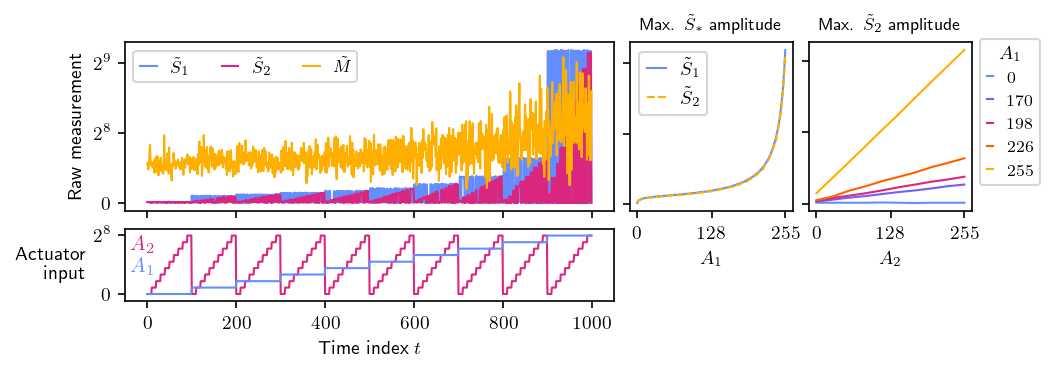

In [17]:
# Load dataset
import causalchamber.datasets as datasets
dataset = datasets.Dataset("wt_test_v1", root="/tmp")
df_fine = dataset.get_experiment("potis_fine").as_pandas_dataframe()
df_coarse = dataset.get_experiment("potis_coarse").as_pandas_dataframe()

# Plot
fig = plt.figure(figsize=(185*MM,58*MM), dpi=150)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(2, 3, wspace=0.06, hspace=0.15, height_ratios=[0.7, 0.3], width_ratios=[0.6, 0.2, 0.2])

#################################################
# Left: time series data with potentiometer sweep
kwargs = {'linewidth': 1}

df = df_coarse
plt.subplot(gs[0,0])
plt.plot(df.signal_1, color=base[0], **kwargs, label=r"$\tilde{S}_1$")
plt.plot(df.signal_2, color=base[2], **kwargs, label=r"$\tilde{S}_2$")
plt.plot(df.mic, color=base[4], **kwargs, label=r"$\tilde{M}$")
plt.gca().set_xticklabels([])
plt.legend(ncol=3, handlelength=1, prop={'size': 8})
plt.yticks([0,256,512], ["$0$", "$2^8$", "$2^9$"])
plt.ylabel("Raw measurement")

# Actuator inputs
plt.subplot(gs[1,0])
plt.plot(df.pot_2, color=base[2], linewidth=1)
plt.plot(df.pot_1, color=base[0], linewidth=1)
plt.xlabel(r"Time index $t$")
plt.yticks([0,256], ["$0$", "$2^8$"])
plt.ylim([-30,285])
plt.ylabel("Actuator\ninput", rotation=0, ha="right", va="center")
plt.text(-40,160, r"$A_1$", color=base[0], ha="left", va="top", size=10)
plt.text(-40,260, r"$A_2$", color=base[2], ha="left", va="top", size=10)

#################################################
# Middle: maximum signal amplitudes
kwargs = {'linewidth': 1}
df = df_fine
plt.subplot(gs[0,1])
dff = df.groupby('pot_1', as_index=False).max()
plt.plot(dff.pot_1, dff.signal_1, color=base[0], **kwargs, label=r"$\tilde{S}_1$")
plt.plot(dff.pot_1, dff.signal_2, color=base[4], **kwargs, label=r"$\tilde{S}_2$", linestyle="--")
plt.xlabel(r"$A_1$")
plt.xticks([0,128,255])
plt.yticks([0,256,512], [])
plt.legend(handlelength=1, loc="upper left")
plt.title(r"Max. $\tilde{S}_*$ amplitude", size=8)


#################################################
# Right: maximum S_2 amplitude for fixed A_1
df = df_coarse
plt.subplot(gs[0,2])
pot_1_levels = np.array(sorted(pd.unique(df.pot_1)))
pot_1_levels = pot_1_levels[[0,-4,-3,-2,-1]]
for i,a1 in enumerate(sorted(pot_1_levels)):
    dff = df[df.pot_1 == a1].groupby('pot_2', as_index=False).max()
    plt.plot(dff.pot_2, dff.signal_2, color=base[i], label=r"$%d$" % a1, **kwargs)
plt.xlabel(r"$A_2$")
plt.legend(title=r"$A_1$", handlelength=0.4, bbox_to_anchor=(1,1.07), loc="upper left", prop={'size': 8})
plt.xticks([0,128,255])
plt.yticks([0,256,512], [])
plt.title(r"Max. $\tilde{S}_2$ amplitude", size=8)

plt.savefig('figures/potentiometer_effects.pdf', bbox_inches='tight')

## Figure 10: Effect of loads and hatch position on microphone, microphone aliasing

Dataset wt_test_v1 found in "/tmp/wt_test_v1".
KstestResult(statistic=0.146484375, pvalue=3.290210911685809e-05)
KstestResult(statistic=0.146484375, pvalue=3.290210911685809e-05)


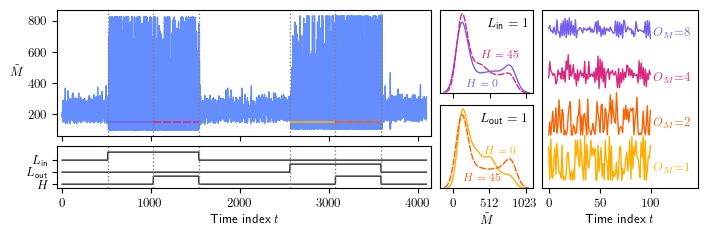

In [18]:
import scipy.stats

# Load dataset
import causalchamber.datasets as datasets
dataset = datasets.Dataset("wt_test_v1", root="/tmp")

# Plot
fig = plt.figure(figsize=(210*MM,60*MM), dpi=100)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(1, 3, wspace=0.04, hspace=0.15, width_ratios=[0.6, 0.15, 0.25])


def plot_lines(ax, where=[50,100,150,200,250]):
    # Plot lines
    for x in where:
        ax.axvline(x, color='gray', linestyle=":", linewidth=1)


##################################
# Left: time series data
df = dataset.get_experiment("mic_effects").as_pandas_dataframe()

gsleft = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], height_ratios=[0.75, 0.25], hspace=0.12)
kwargs = {'linewidth': 1}
lw = 1

changepoints = np.array([512, 1024, 512 + 1024])
changepoints = np.hstack([changepoints, changepoints + 2048])

# Microphone
plt.subplot(gsleft[0,0])
plt.plot(df.mic, **kwargs, color=base[0])
ax = plt.gca()
ax.set_xticklabels([])
plot_lines(ax, changepoints)
plt.ylabel(r"$\tilde{M}$", rotation=0, ha="right", va="center")
kwargs = {'linewidth': 1.2}
ls=(0,(5,1))#"--"
h = 150
ax.hlines(h, 512, 1024, color=base[1], **kwargs)
ax.hlines(h, 1024, 1024+512, color=base[2], **kwargs, linestyle=ls)
ax.hlines(h, 512 + 2048, 1024 + 2048, color=base[4], **kwargs)
ax.hlines(h, 1024 + 2048, 1024 + 512 + 2048, color=base[3], **kwargs, linestyle=ls)
plt.xlim([-60,4150])
plt.xticks([0, 1000, 2000, 3000, 4000])

# Actuators
plt.subplot(gsleft[1,0])
ax = plt.gca()
color="#2a2a2a"
plt.plot(norm(df.load_in)*0.2-0.3, color=color, linewidth = lw)
plt.plot(norm(df.load_out)*0.2-0.6, color=color, linewidth = lw)
plt.plot(norm(df.hatch)*0.2-0.9, color=color, linewidth = lw)
plt.xlabel("Time index $t$")
plt.yticks([-0.3, -0.6, -0.9],[r'$L_\text{in}$', r'$L_\text{out}$', r'$H$'])
plt.ylim([-1, 0.05])
plt.xlim([-60,4150])
plt.xticks([0, 1000, 2000, 3000, 4000])
plot_lines(ax, changepoints)

###############################################
# Center: distributions under open/closed hatch

dff = df[df.load_in == 1]
min_0, min_45 = dff[dff.hatch == 0].mic, dff[dff.hatch == 45].mic
print(scipy.stats.ks_2samp(min_0, min_45))
dff = df[df.load_out == 1]
mout_0, mout_45 = dff[dff.hatch == 0].mic, dff[dff.hatch == 45].mic
print(scipy.stats.ks_2samp(mout_0, mout_45))

gscenter = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], hspace=0.15)
plt.subplot(gscenter[0])
ax = plt.gca()
kwargs = {'linewidth': 1}
sns.kdeplot(min_0, color=base[1], **kwargs)
sns.kdeplot(min_45, color=base[2], linestyle=ls, **kwargs)
ax.set_yticklabels([])
ax.set_ylabel("")
plt.xticks([0, 512, 1023], [])
plt.yticks([])
plt.text(0.95,0.9,r"$L_\text{in} = 1$",transform = ax.transAxes, ha="right", va="top", size=9.5)
plt.text(0.45,0.1,r"$H=0$",transform = ax.transAxes, ha="center", va="center", color=base[1], size=8)
plt.text(0.65,0.45,r"$H=45$",transform = ax.transAxes, ha="center", va="center", color=base[2], size=8)

plt.subplot(gscenter[1])
ax = plt.gca()
sns.kdeplot(mout_0, color=base[4], label=r"$H=0$", **kwargs)
sns.kdeplot(mout_45, color=base[3], linestyle=ls, label=r"$H=45$", **kwargs)
ax.set_yticklabels([])
ax.set_ylabel("")
plt.xticks([0, 512, 1023])
plt.yticks([])
plt.xlabel(r"$\tilde{M}$")
#r"$H=0$", r"$H=45$"
plt.text(0.95,0.9,r"$L_\text{out} = 1$",transform = ax.transAxes, ha="right", va="top", size=9.5)
plt.text(0.65,0.45,r"$H=0$",transform = ax.transAxes, ha="center", va="center", color=base[4], size=8)
plt.text(0.45,0.12,r"$H=45$",transform = ax.transAxes, ha="center", va="center", color=base[3], size=8)


#####################################
# Right: aliasing due to oversampling

df = dataset.get_experiment("osr_mic").as_pandas_dataframe()

plt.subplot(gs[2])
df1 = df[df.osr_mic == 1]
min0, max0 = df1.mic.min(), df1.mic.max()
for i,osr in enumerate([8,4,2,1]):
    dff = df[df.osr_mic == osr]
    color = base[i+1]
    values = (dff.mic.iloc[0:100].values - min0) / (max0 - min0)
    plt.plot(values - i, color =color, linewidth=1)
    plt.text(102, -i + 0.2, r"$O_M$=$%d$" % osr, color=color, size=9)
    plt.xlabel("Time index $t$")
    plt.xlim([-7, 145])
plt.yticks([])
plt.savefig("figures/microphone_effects.pdf", bbox_inches="tight")

## Figure 13: Effect of photodiode and exposure time on light-sensor readings

Dataset lt_test_v1 found in "/tmp/lt_test_v1".


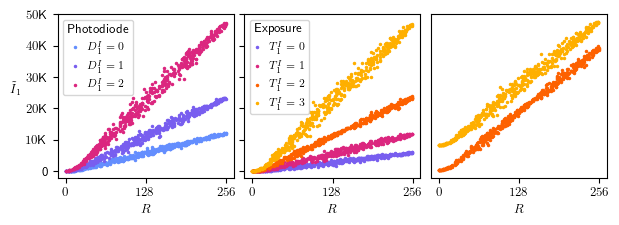

In [19]:
#################################
# Load dataset
import causalchamber.datasets as datasets
dataset = datasets.Dataset("lt_test_v1", root="/tmp")
df = dataset.get_experiment("ir_sensors").as_pandas_dataframe()

#################################
# Plot
plt.figure(figsize=(180*MM,55*MM), dpi=100)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(1, 3, wspace=0.06, hspace=0.0)
kwargs = {'s': 9}

# Diodes
size = {0: 'small', 1:'medium', 2:'large'}
plt.subplot(gs[0])
Ds = sorted(pd.unique(df.diode_ir_1))
for i,d in enumerate(Ds):
    dff = df[(df.flag==1) & (df.diode_ir_1 == d)]
    plt.scatter(dff.red, dff.ir_1, color=base[i], marker='.', label=r"$D^I_1=%d$" % (d), **kwargs)
plt.legend(title="Photodiode", prop={'size': 8}, handlelength=0.5)
plt.ylim([-2000,50000])
plt.yticks([0,1e4, 2e4, 3e4, 4e4, 5e4], [0, "$10$K", "$20$K", "$30$K", "$40$K", "$50$K"])
plt.ylabel(r"$\tilde{I}_1$", rotation=0, ha="right")
plt.xlabel(r"$R$")
plt.xticks([0,128,256])

# Exposure times
plt.subplot(gs[1])
Ts = sorted(pd.unique(df.t_ir_1))
for i,t in enumerate(Ts):
    dff = df[(df.flag==0) & (df.t_ir_1 == t)]
    plt.scatter(dff.red, dff.ir_1, color=base[i+1], marker='.', label=r"$T^I_1=%d$" % t, **kwargs)
plt.legend(title="Exposure", prop={'size': 8}, handlelength=0.5)
plt.ylim([-2000,50000])
plt.yticks([0,1e4, 2e4, 3e4, 4e4, 5e4], [])
plt.xlabel(r"$R$")
plt.xticks([0,128,256])

# Exposure times (detail)
plt.subplot(gs[2])
which = [2,3]
scolor = [base[i+1] for i in which]
for i,t in enumerate(which):
    dff = df[(df.flag==0) & (df.t_ir_1 == t)]
    plt.scatter(dff.red, norm(dff.ir_1)+i*0.2, color=scolor[i], marker='.', label=r"$T^I_1=%d$" % t, **kwargs)
plt.yticks([])
plt.xlabel(r"$R$")
plt.xticks([0,128,256])
plt.savefig('figures/diodes_exposures.pdf', bbox_inches='tight')

## Figure 15: Rheostat effects visible under conditioning

Dataset lt_walks_v1 found in "/tmp/lt_walks_v1".


Text(0.5, 1.0, 'Observations where $|\\theta_1 - \\theta_2| \\in [85,95]$')

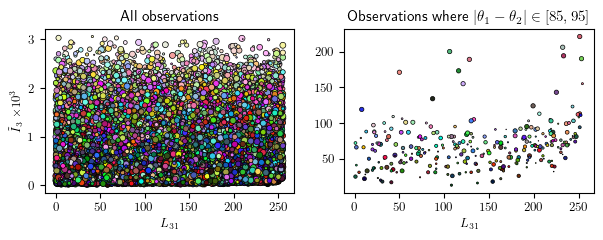

In [20]:
#################################
# Load dataset
import causalchamber.datasets as datasets
dataset = datasets.Dataset("lt_walks_v1", root="/tmp")
df = dataset.get_experiment("actuators_white").as_pandas_dataframe()

#################################
# Plot
plt.figure(figsize=(180*MM,55*MM), dpi=100)
matplotlib.rcParams.update({'font.size': 9})
gs = gridspec.GridSpec(1, 3, wspace=0.06, hspace=0.0)
kwargs = {'linewidth': 0.5}

#df = df.iloc[27500:]

plt.subplot(121)
c = df[['red', 'green', 'blue']].values / 255
plt.scatter(df['l_31'], df['ir_3'], c=c, edgecolor='black', marker='o', s=df['l_32']/255 * 20, **kwargs)
plt.xlabel("$L_{31}$")
format_y_axis(plt.gca(), label='$\\tilde{I}_3$')        
plt.title("All observations")
plt.subplot(122)
pol_dif = abs(df.pol_1 - df.pol_2)
mask = pol_dif < 92
mask &= pol_dif > 88
#cutoff = 200
#mask &= df.red < cutoff
#mask &= df.green < cutoff
#mask &= df.blue < cutoff
#mask &= df.l_32 < 200
c = df[mask][['red', 'green', 'blue']].values / 255
plt.scatter(df[mask]['l_31'], df[mask]['ir_3'], c=c, edgecolor='black', marker='o', s=df[mask]['l_32']/255 * 10, **kwargs)
plt.xlabel("$L_{31}$")
plt.title("Observations where $|\\theta_1 - \\theta_2| \in [85,95]$")

# plt.savefig("figures/effects_conditioning.png", dpi=300, bbox_inches='tight')